In [1]:
import os

## get the data from the previously created directories

In [2]:
base_directory = "C:\\Users\Ramy\.keras\datasets\cats_dogs_small"

In [3]:
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')
test_directory = os.path.join(base_directory, 'test')

In [4]:
train_cats_dir = os.path.join(train_directory, 'cats')
train_dogs_dir = os.path.join(train_directory, 'dogs')
validation_cats_dir = os.path.join(validation_directory, 'cats')
validation_dogs_dir = os.path.join(validation_directory, 'dogs')
test_cats_dir = os.path.join(test_directory, 'cats')
test_dogs_dir = os.path.join(test_directory, 'dogs')

In [5]:
len(os.listdir(train_cats_dir))

1000

### Data reprocessing

In [6]:
import keras

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#rescale pixels for standardization
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_generator

In [10]:
train_generator = train_data_generator.flow_from_directory(train_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=20, 
                                                                class_mode='binary') # because we haveo nly two classes! binary

Found 2000 images belonging to 2 classes.


In [11]:
print('Shape: ' , train_generator.image_shape)
print('color format: ', train_generator.color_mode)

Shape:  (150, 150, 3)
color format:  rgb


In [12]:
validation_generator = test_data_generator.flow_from_directory(validation_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=20, 
                                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
print('Shape: ' , validation_generator.image_shape)
print('color format: ', validation_generator.color_mode)

Shape:  (150, 150, 3)
color format:  rgb


### creating the CNN model

In [14]:
from keras import layers
from keras import models
from keras import optimizers

In [15]:
model = models.Sequential()

In [16]:
#Layer 1
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))

In [17]:
#layer 2
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [18]:
#layer 3
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [19]:
#layer 4
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [20]:
#flatten  and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ["accuracy"])

In [23]:
import sys
from PIL import Image

### Keras can't handle any empty or destroyed image. so we will use PILLOW library for that reason

In [25]:
history = model.fit(train_generator, 
                             steps_per_epoch=100, 
                             epochs= 5, 
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/5
100/100 [==============================] - 53s 531ms/step - loss: 0.6705 - accuracy: 0.5805 - val_loss: 0.6534 - val_accuracy: 0.6240
Epoch 2/5
100/100 [==============================] - 55s 549ms/step - loss: 0.6277 - accuracy: 0.6500 - val_loss: 0.6313 - val_accuracy: 0.6400
Epoch 3/5
100/100 [==============================] - 56s 559ms/step - loss: 0.5798 - accuracy: 0.7060 - val_loss: 0.6189 - val_accuracy: 0.6410
Epoch 4/5
100/100 [==============================] - 61s 610ms/step - loss: 0.5462 - accuracy: 0.7240 - val_loss: 0.6021 - val_accuracy: 0.6730
Epoch 5/5
100/100 [==============================] - 54s 543ms/step - loss: 0.5216 - accuracy: 0.7370 - val_loss: 0.5593 - val_accuracy: 0.7030


In [26]:
model.save('cat_dog_small_')

INFO:tensorflow:Assets written to: cat_dog_small_\assets


In [27]:
import matplotlib.pyplot as plt

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

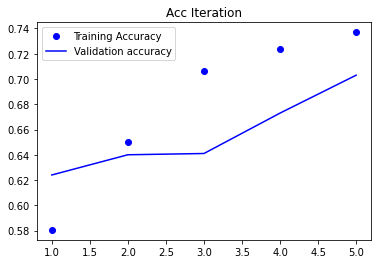

In [29]:
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Acc Iteration')
plt.legend()

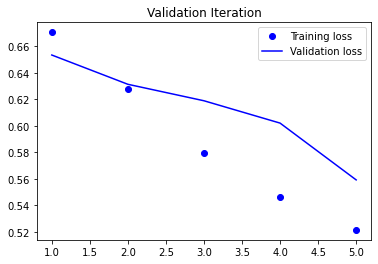

In [30]:
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Iteration')
plt.legend()

### Images Augmentation

In [31]:
datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

### Displaying Images

In [33]:
from keras.preprocessing import image

In [34]:
fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

In [35]:
len(fnames)

1000

In [37]:
fnames[100]

'C:\\Users\\Ramy\\.keras\\datasets\\cats_dogs_small\\train\\cats\\189.jpg'

In [38]:
# choosing an image to augment
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))

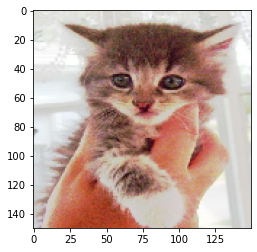

In [42]:
plt.imshow(img)

In [44]:
x = image.img_to_array(img) #converted image to numpy array 3D

In [46]:
#reshaping image
x = x.reshape((1,) + x.shape)

i:  1
i:  1


<function matplotlib.pyplot.show(*args, **kw)>

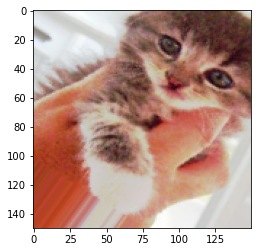

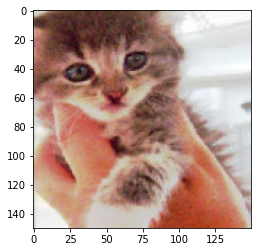

In [47]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    print("i: " , 1)
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break
plt.show

### Training the same model with adding a dropout layer 

In [48]:
DAmodel = models.Sequential()
#Layer 1
DAmodel.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
DAmodel.add(layers.MaxPooling2D(2,2))
#layer 2
DAmodel.add(layers.Conv2D(64, (3,3), activation = 'relu'))
DAmodel.add(layers.MaxPooling2D(2,2))
#layer 3
DAmodel.add(layers.Conv2D(128, (3,3), activation = 'relu'))
DAmodel.add(layers.MaxPooling2D(2,2))
#layer 4
DAmodel.add(layers.Conv2D(128, (3,3), activation = 'relu'))
DAmodel.add(layers.MaxPooling2D(2,2))
#flatten  and dense layers
DAmodel.add(layers.Flatten())
DAmodel.add(layers.Dropout(0.5))
DAmodel.add(layers.Dense(512, activation = 'relu'))
DAmodel.add(layers.Dense(1, activation = 'sigmoid'))

DAmodel.summary()

In [50]:
DAmodel.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ["accuracy"])

### Augmented data generation for training

In [52]:
train_datage = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,)

### Normal data generation for testing and validation

In [53]:
test_datagen = ImageDataGenerator(rescale=1./255)

### generating for training and testing data

In [54]:
train_generator = train_datage.flow_from_directory(train_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=32, 
                                                                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=32, 
                                                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [57]:
Newmodel = DAmodel.fit(train_generator, 
                             steps_per_epoch=50, 
                             epochs= 5, 
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/5
50/50 [==============================] - 46s 918ms/step - loss: 0.6846 - accuracy: 0.5511 - val_loss: 0.6727 - val_accuracy: 0.5790
Epoch 2/5
50/50 [==============================] - 43s 849ms/step - loss: 0.6757 - accuracy: 0.5676
Epoch 3/5
50/50 [==============================] - 43s 856ms/step - loss: 0.6753 - accuracy: 0.5657
Epoch 4/5
50/50 [==============================] - 48s 966ms/step - loss: 0.6642 - accuracy: 0.5850
Epoch 5/5
50/50 [==============================] - 44s 885ms/step - loss: 0.6644 - accuracy: 0.5794


In [59]:
acc = Newmodel.history['accuracy']
val_acc = Newmodel.history['val_accuracy']
loss = Newmodel.history['loss']
val_loss = Newmodel.history['val_loss']
epochs = range(1, len(acc) + 1)

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

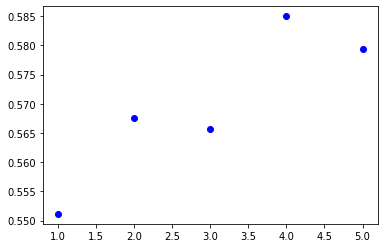

In [60]:
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Acc Iteration')
plt.legend()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Iteration')
plt.legend()